In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
df = pd.read_csv("train.tsv",sep="\t")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
len(df)

156060

In [4]:
df.drop_duplicates(subset = "SentenceId",keep="first",inplace=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


In [5]:
len(df)

8529

In [6]:
# to know the len of each instance we would use len of x split with would split into words and then take the len
seqlen = df['Phrase'].apply((lambda x:len(x.split())))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Phrase', ylabel='Density'>

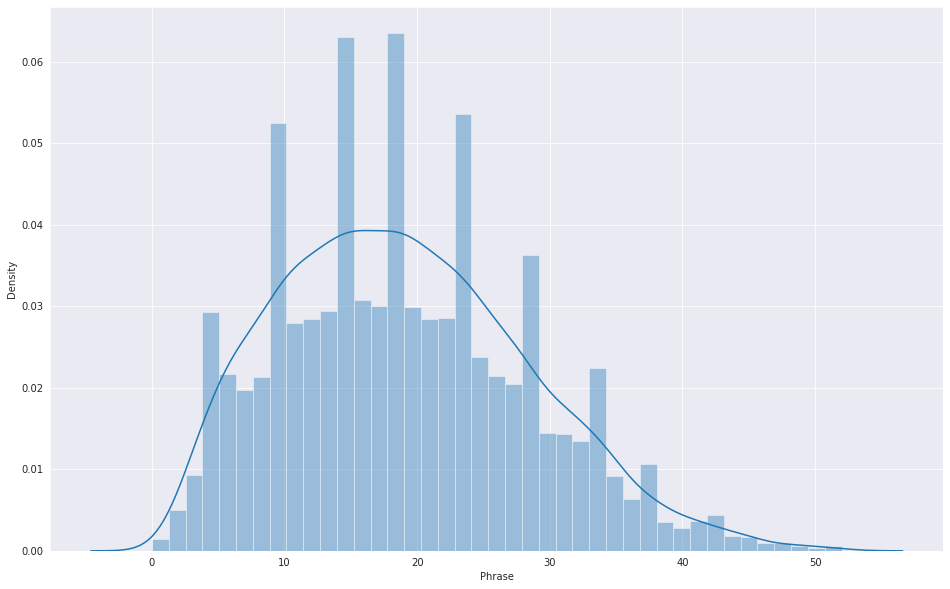

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))
sns.distplot(seqlen)

In [8]:
# seq len should be set to 50
seq_len = 50

In [9]:
from transformers import AutoTokenizer

In [10]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [11]:
#
sample_token = tokenizer.encode_plus("hello world",max_length=seq_len,
                                      truncation = True,padding = "max_length",
                                     add_special_tokens=True,return_token_type_ids = False,
                                      return_attention_mask=True,return_tensors='tf')

In [12]:
#
sample_token

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [13]:
Xid = np.zeros((len(df),seq_len))
Xmask = np.zeros((len(df),seq_len))

In [14]:
for i, sequence in enumerate(df['Phrase']):
    tokens = tokenizer.encode_plus(sequence, max_length= seq_len,
                                 truncation = True,padding = "max_length",
                                 add_special_tokens=True,return_token_type_ids = False,
                                      return_attention_mask=True,return_tensors='tf')
    Xid[i,:],Xmask[i,:] = tokens['input_ids'], tokens['attention_mask']

In [15]:
Xid[1]

array([  101.,  1188.,  3589.,   117., 27553., 16776.,  1105., 15021.,
        2457.,  1110.,  3869.,  5788.,   119.,   102.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.])

In [16]:
Xmask[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:

df['Sentiment'].unique

<bound method Series.unique of 0         1
63        4
81        1
116       3
156       1
         ..
155984    2
155997    2
156021    1
156031    1
156039    2
Name: Sentiment, Length: 8529, dtype: int64>

In [18]:
arr_len = df['Sentiment'].values
arr_len.size

8529

In [19]:
target_lables = np.zeros((arr_len.size, arr_len.max()+1))


In [20]:
target_lables[np.arange(arr_len.size), arr_len] = 1
target_lables

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [21]:
with open('Xid.npy', "wb") as f:
    np.save(f,Xid)
with open('Xmask.npy', "wb") as f:
    np.save(f,Xmask)
with open('target_lables.npy', "wb") as f:
    np.save(f,target_lables)
    
del df, Xid, Xmask, target_lables

In [22]:
with open("Xid.npy",'rb') as fp:
    Xid = np.load(fp)
with open("Xmask.npy",'rb') as fp:
    Xmask = np.load(fp)
with open("target_lables.npy",'rb') as fp:
    target_lables = np.load(fp)
    

In [23]:
# dataset obj 
dataset = tf.data.Dataset.from_tensor_slices((Xid,Xmask,target_lables))

In [24]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [25]:
def map_fun(input_ids,masks,labels):
    return {'input_ids':input_ids, 'attention_mask':masks},labels

In [26]:
dataset = dataset.map(map_fun)

In [27]:
dataset = dataset.shuffle(100).batch(32)

In [28]:
ds_len = len(list(dataset))

In [29]:
split_r = .9

train = dataset.take(round(ds_len * split_r))
test = dataset.skip(round(ds_len * split_r))
del dataset

In [30]:
from transformers import TFAutoModel

In [31]:
bert = TFAutoModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [32]:
input_ids = tf.keras.layers.Input(shape=(seq_len,),name="input_ids",dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,),name="attention_mask",dtype = "int32")

embeddings = bert(input_ids, attention_mask = mask)[0]

X = tf.keras.layers.GlobalMaxPool1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128,activation = 'relu')(X)
X = tf.keras.layers.Dropout(.1)(X)
X = tf.keras.layers.Dense(32,activation="relu")(X)
y = tf.keras.layers.Dense(5,activation = "softmax",name='outputs')(X)

model = tf.keras.Model(inputs=[input_ids,mask],outputs=y)
model.layers[2].trainable = False

In [33]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 50, 768), (N 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 768)          0           tf_bert_model[0][0]   

In [34]:
optimizer = tf.keras.optimizers.Adam(.01)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy("accuracy")

model.compile(optimizer=optimizer,loss=loss,metrics= [acc])

In [ ]:
history = model.fit(train,validation_data=test,epochs=110)